In [2]:
file_prefix <- "ch17.2"
reuse_fit <- T
source("preset.R")

# data

In [3]:
data <- read_csv("data/HierLinRegressData.csv") %>% 
  mutate(s = as.integer(Subj))
stan_data <- list(
  N = nrow(data), 
  N_subj = n_distinct(data$s), 
  x = data$X, 
  y = data$Y, 
  s = data$s, 
  mean_x = mean(data$X), 
  sd_x = sd(data$X), 
  mean_y = mean(data$Y), 
  sd_y = sd(data$Y)
)

Parsed with column specification:
cols(
  Subj = col_double(),
  X = col_double(),
  Y = col_double()
)



# fit

In [4]:
init <- function() list(m_a = 3, m_b = -100)
fit <- stan(file = "model/ch17.2.stan", data = stan_data, init = init, seed = 123, 
            chains = 4, warmup = 1000, iter = 50000, thin = 4, 
            control = list(max_treedepth = 15))

Warning message:
“There were 3992 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”
Warning message:
“There were 2 chains where the estimated Bayesian Fraction of Missing Information was low. See
http://mc-stan.org/misc/warnings.html#bfmi-low”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#tail-ess”


In [5]:
save(fit, file = save_file_name("fit"))
load(file = save_file_name("fit"))

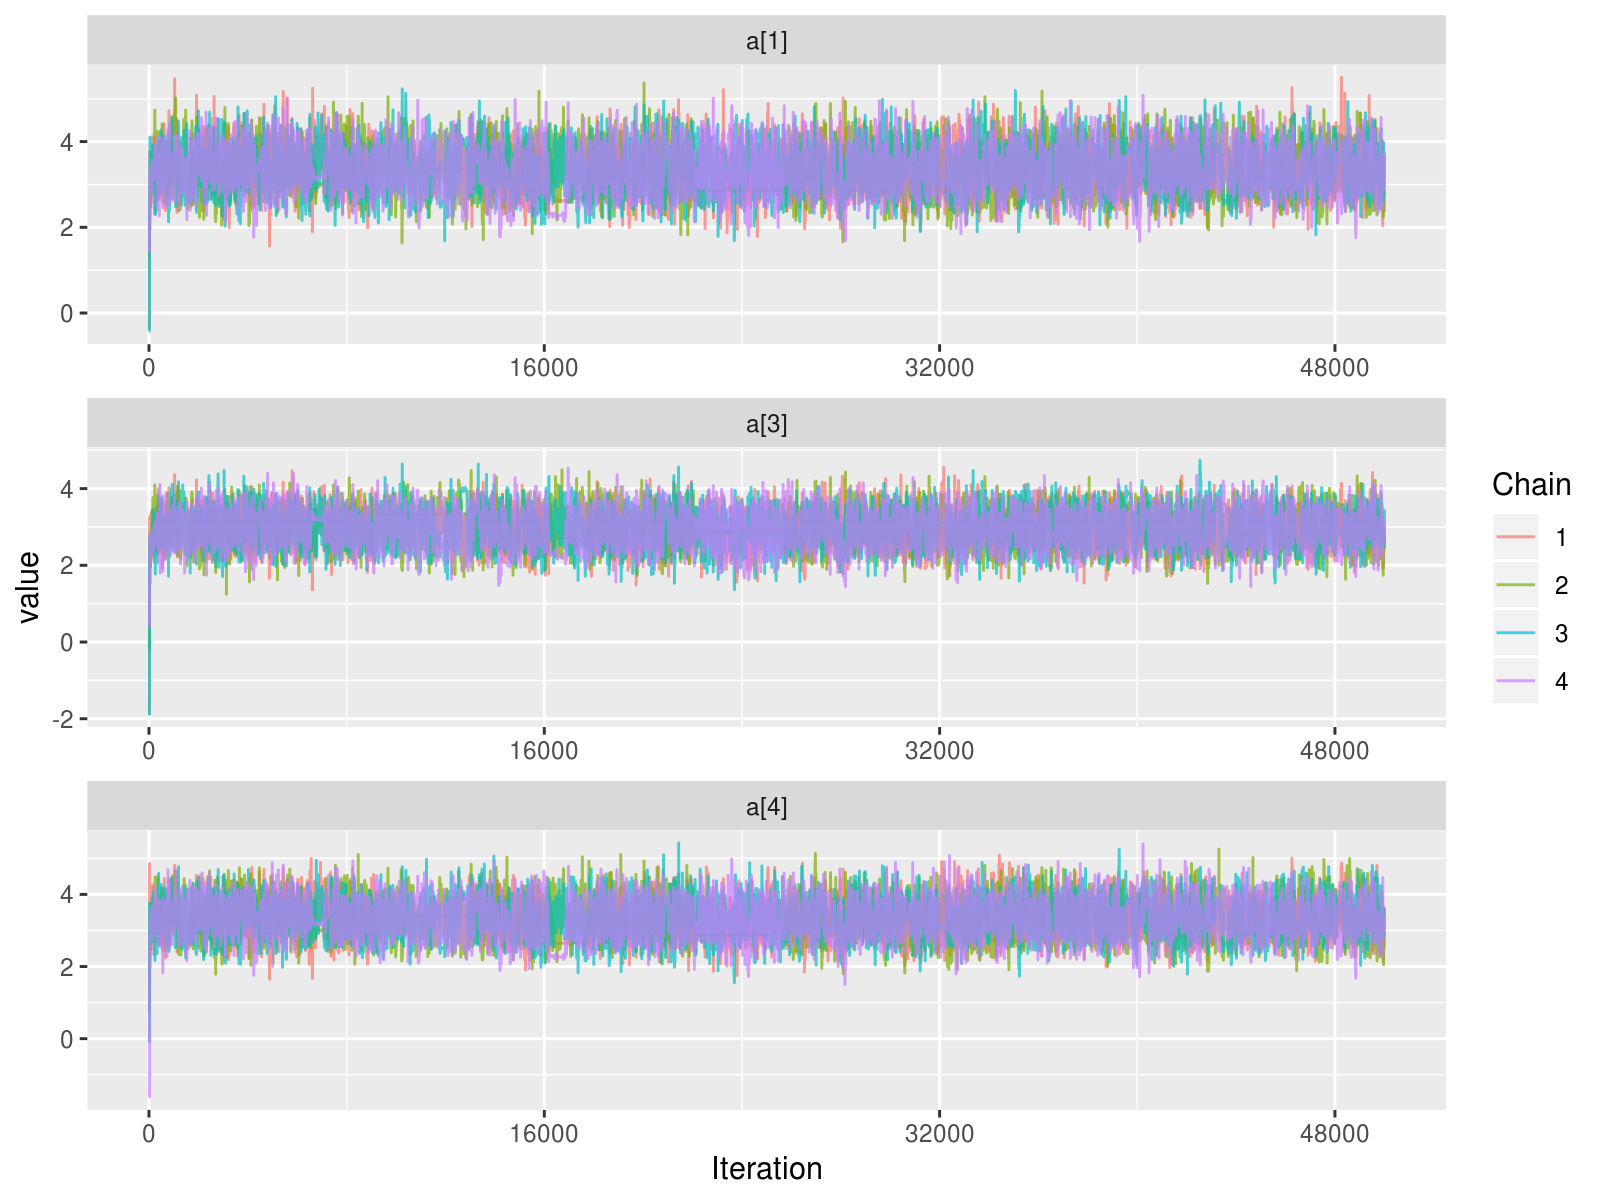

In [8]:
set_plot_size(8, 6)
ggs_traceplot(ggs(fit, family = "a\\[[134]\\]", inc_warmup = T))

# result

In [9]:
res <- fit_to_tibble(fit)

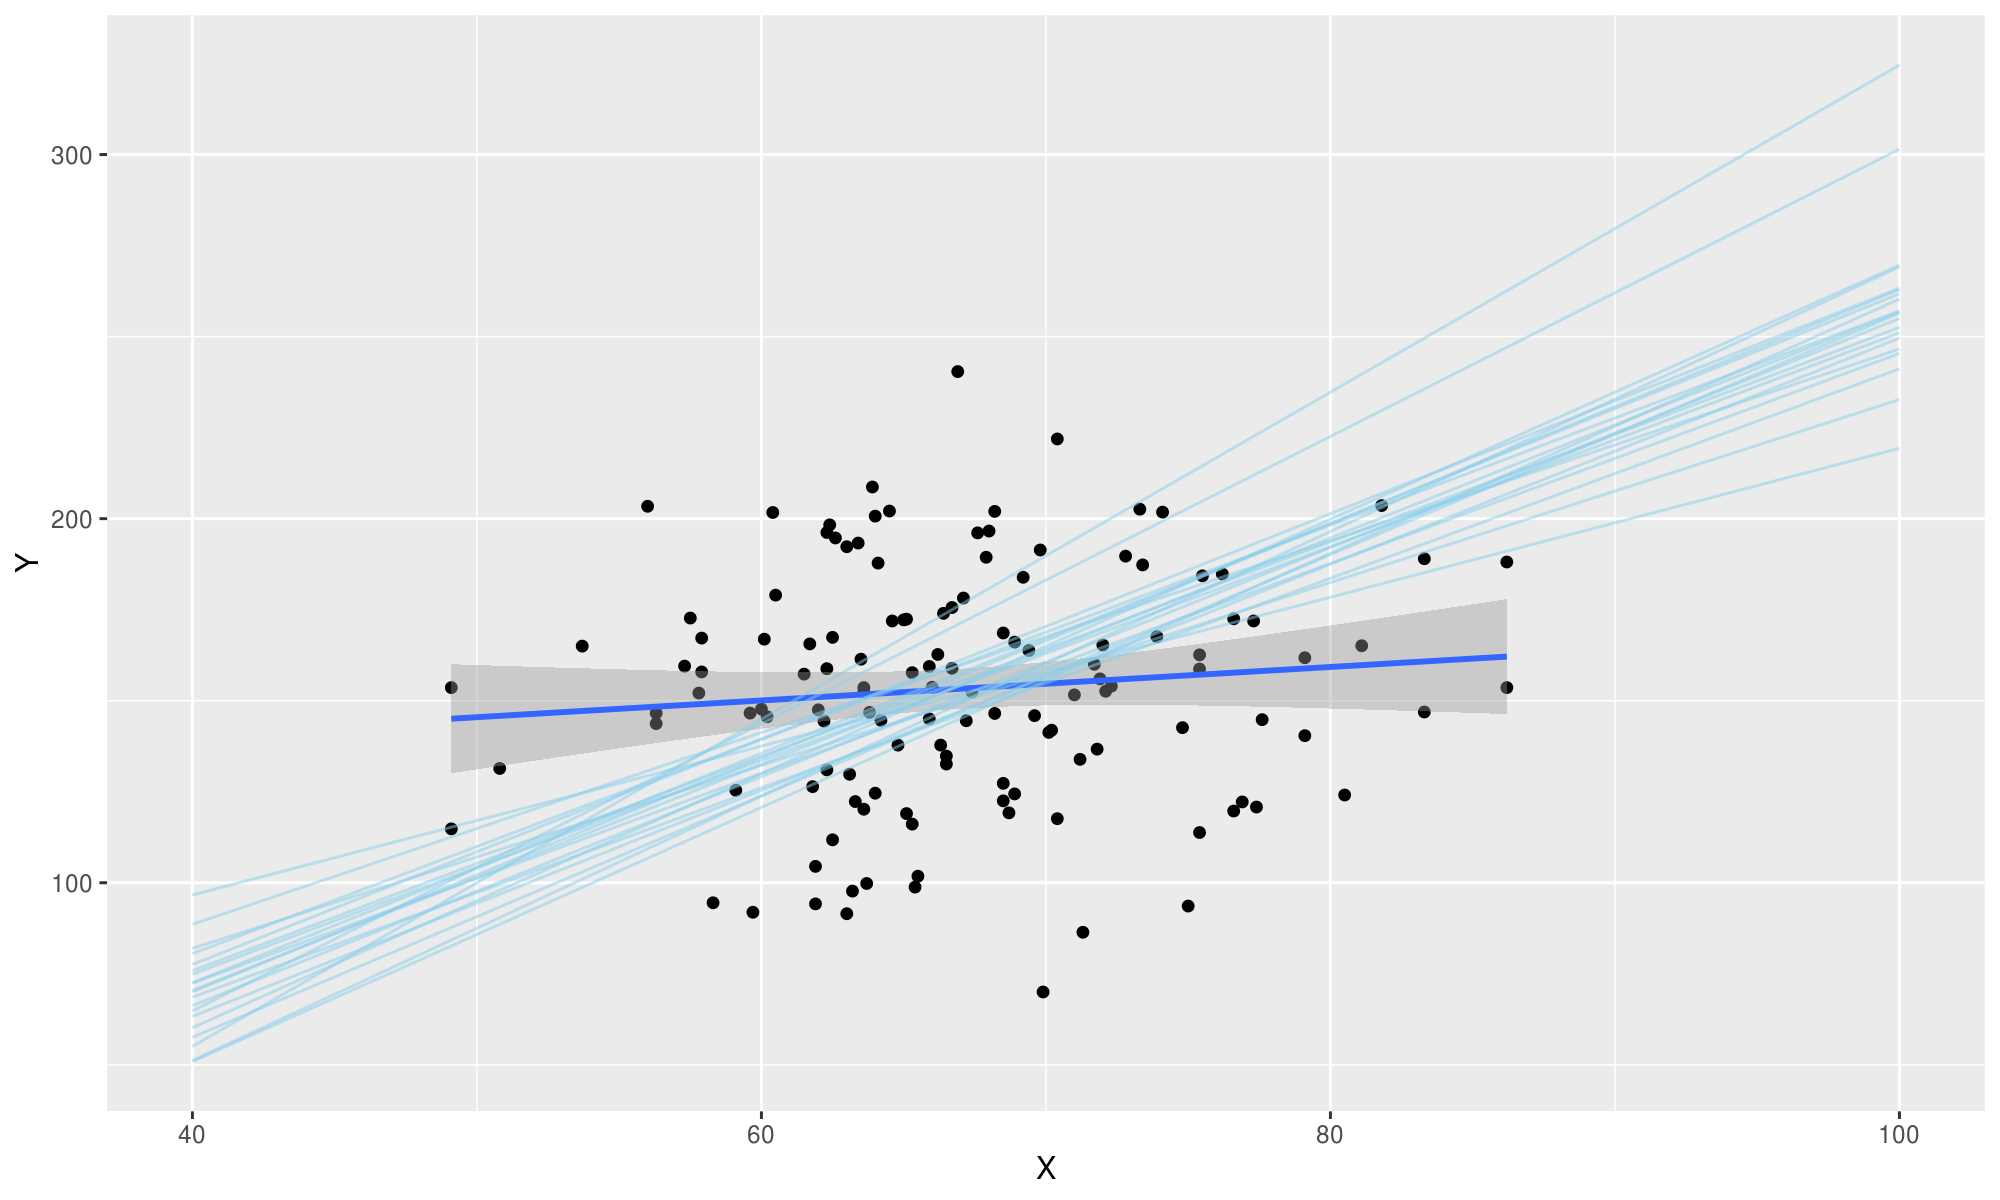

In [12]:
# total regression by lm
set_plot_size(10, 6)
xs <- seq(40, 100, length = 10)
line_grid <- res %>% 
  sample_n(20) %>% 
  make_line_grid(xs, y_func = m_a * X + m_b)
ggplot(data, aes(X, Y)) +
  geom_point() + 
  geom_smooth(method = "lm") + 
  geom_line(data = line_grid, aes(group = line_id), color = "skyblue", alpha = 0.5)

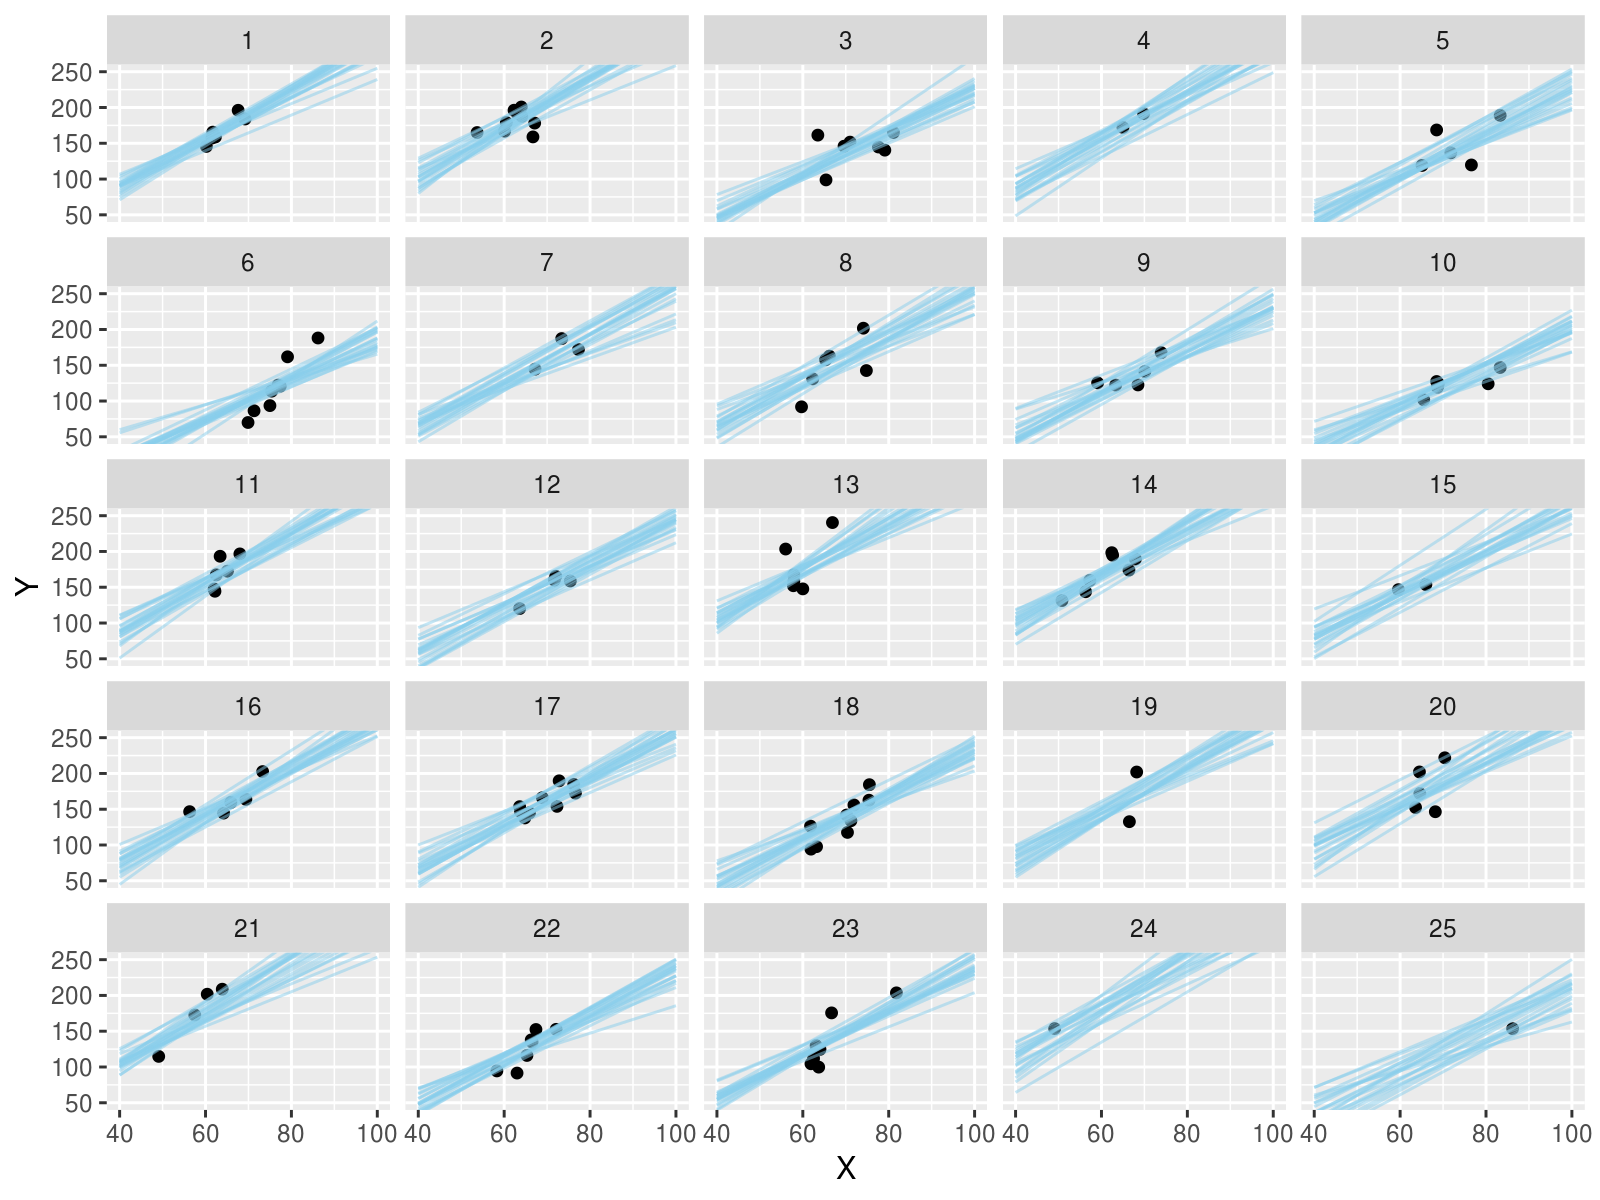

In [14]:
# regression by group
set_plot_size(8, 6)
grid <- res %>% sample_n(20) %>% 
  multi_gather(matches("(a|b)_.*"), col_name = "s") %>% 
  make_line_grid(xs, y_func = a * X + b) 
ggplot(data, aes(X, Y)) + 
  geom_point() + 
  geom_line(data = grid, aes(group = line_id), color = "skyblue", alpha=0.5) + 
  coord_cartesian(xlim = c(40, 100), ylim = c(50, 250)) + 
  facet_wrap(~ s, ncol = 5)